## Distributions

In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
raw_data_path = os.path.join("../data", "raw")
train_file_path = os.path.join(raw_data_path, "train.csv")
test_file_path = os.path.join(raw_data_path, "test.csv")

In [6]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [7]:
test_df["Survived"] = -888 #Adding new Column 

In [8]:
df = pd.concat((train_df, test_df), axis=0, sort=True)

In [9]:
#Histogram
df.Age.plot(kind="hist", title="Histogram for Age", color="c");

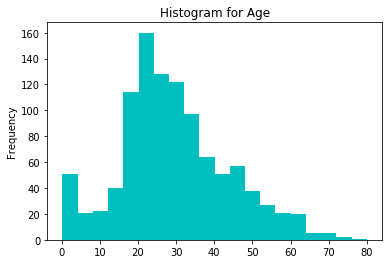

In [10]:
df.Age.plot(kind="hist", title="Histogram for Age", color="c", bins=20);

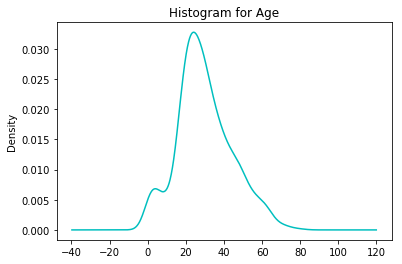

In [11]:
df.Age.plot(kind="kde", title="KDE for Age", color="c");

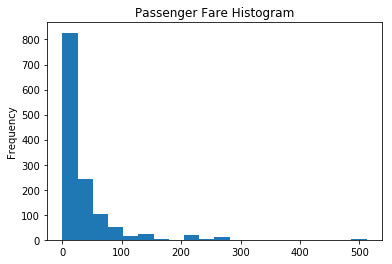

In [13]:
df.Fare.plot(kind="hist", title="Passenger Fare Histogram", bins=20)

In [15]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.41
skewness for fare : 4.37


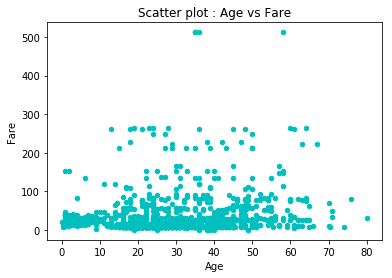

In [17]:
#Scatter plot
df.plot.scatter(x="Age", y="Fare", color="c", title="Scatter plot : Age vs Fare");

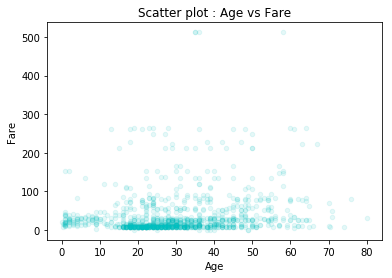

In [18]:
df.plot.scatter(x="Age", y="Fare", color="c", title="Scatter plot : Age vs Fare", alpha=0.1);

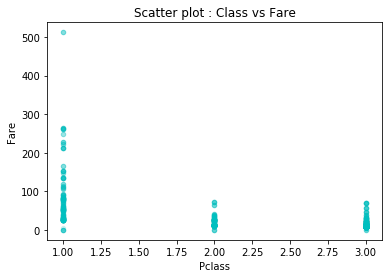

In [19]:
df.plot.scatter(x="Pclass", y="Fare", color="c", title="Scatter plot : Class vs Fare", alpha=0.15);

## Grouping and Aggregations

In [20]:
df.groupby("Sex").Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [21]:
df.groupby("Pclass").Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [22]:
df.groupby("Pclass").Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [27]:
df.groupby("Pclass")["Fare", "Age"].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [28]:
df.groupby("Pclass").agg({"Fare": "mean", "Age": "median"})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [30]:
#more complicated aggregation
aggregation = {
    "Fare": {
        "mean_fare": "mean",
        "median_fare": "median",
        "max_fare": max,
        "min_fare": np.min
    },
    "Age": {
        "median_age": "median",
        "min_age": min,
        "max_age": max,
        "range_age": lambda x: max(x) - min(x) #calc range pr group
    }
}

In [31]:
df.groupby("Pclass").agg(aggregation)

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_fare median_fare  max_fare min_fare median_age min_age max_age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [32]:
df.groupby(["Pclass", "Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

### Crosstab

In [33]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


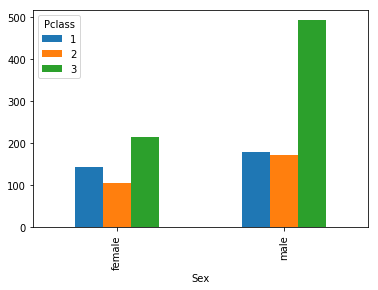

In [34]:
pd.crosstab(df.Sex, df.Pclass).plot(kind="bar")

### Pivot Table

In [36]:
df.pivot_table(index="Sex", columns="Pclass", values="Age", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [37]:
df.groupby(["Sex", "Pclass"]).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [38]:
df.groupby(["Sex", "Pclass"]).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


Data quality:
Missing values
Extreme values/ outliers
Erroneous values

### Missing value
common

Solutions:
- Delete(used when few cases) 
- imputation(replace with some plausable value)

Mean Imputation:
replace missing value with mean value
- affected by mean extreme values

Median Imputation:
replace missing value with median value

Mode Imputation:
(Categorical value)
Highest frequency value

Forwardfill/Backwardfill

Predictive Model




### Data Munging

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature: Embarked

In [20]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,AgeState
PassengerId,,,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572,very_high,Adult
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572,very_high,Adult


In [21]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [22]:
#which embarked point has highest number of surviors
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [23]:
#Replace missing values
#df.loc[df.Embarked.isnull(), "Embarked"] = "S"
#df.Embarked.fillna("S", inplace=True)

In [24]:
#Option 2: explore the fare of each class for each embarkment point
df.groupby(["Pclass", "Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [25]:
df.Embarked.fillna("C", inplace=True)

In [26]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,AgeState
PassengerId,,,,,,,,,,,,,


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Fare_Bin    1308 non-null category
AgeState    1309 non-null object
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 134.4+ KB


### Feature: Fare

In [28]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,AgeState
PassengerId,,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701,NaN,Adult


In [29]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == "S"), "Fare"].median()
print(median_fare)

8.05


In [30]:
#replace value with median
df.Fare.fillna(median_fare, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Fare_Bin    1308 non-null category
AgeState    1309 non-null object
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 134.4+ KB


### Feature: Age

In [32]:
pd.options.display.max_rows = 15

In [33]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,AgeState
PassengerId,,,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877,low,Child
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373,low,Child
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649,very_low,Child
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631,very_low,Child
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959,very_low,Child
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216,very_low,Child
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569,very_high,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498,high,Child


#### option 1: replace missing with mean

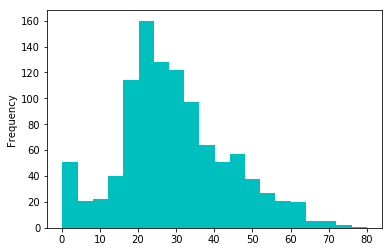

In [34]:
df.Age.plot(kind="hist", bins=20, color="c");

In [35]:
df.Age.mean()

29.881137667304014

In [36]:
#Note: Extreme values = old age

In [37]:
df.groupby("Sex").Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

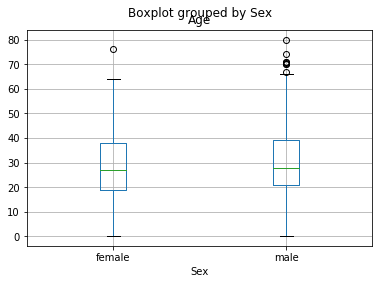

In [38]:
df[df.Age.notnull()].boxplot("Age", "Sex");

In [39]:
#First option replace commands
#age_sex_median = df.groupby("Sex").Age.transform("median")
#df.Age.fillna(age_sex_median, inplace=True)


#### Option 3: replace with median age of Pclass

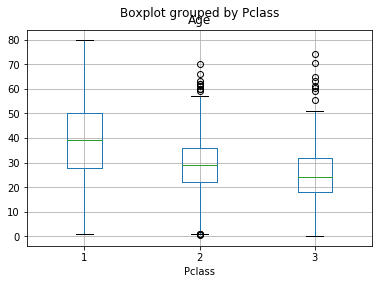

In [40]:
df[df.Age.notnull()].boxplot("Age","Pclass");

In [41]:
#replace
# pclass_age_median = df.groupby("Pclass").Age.transform("median")
#df.Age.fillna(pclass_age_median, inplace=True)

#### Option 4: replace with median age of title

In [42]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [43]:
#Function to exctract Title from name

def get_title(name):
    first_name_with_title = name.split(",")[1]
    title = first_name_with_title.split(".")[0]
    title = title.strip().lower()
    return title


In [44]:
#use get_title
df.Name.map(lambda x: get_title(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [45]:
def get_title(name):
    title_group = {
        "mr": "Mr",
        "mrs": "Mrs",
        "miss": "Miss",
        "master": "Master",
        "don": "Sir",
        "rev": "Sir",
        "dr": "Officer",
        "mme": "Mrs",
        "ms": "Mrs",
        "major": "Officer",
        "lady": "Lady",
        "sir": "Sir",
        "mlle": "Miss",
        "col": "Officer",
        "capt": "Officer",
        "the countess": "Lady",
        "jonkheer": "Sir",
        "dona": "Lady"
    }
    
    first_name_with_title = name.split(",")[1]
    title = first_name_with_title.split(".")[0]
    title = title.strip().lower()
    return title_group[title]
    

In [46]:
#create Title feature
df["Title"] = df.Name.map(lambda x: get_title(x))

In [47]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,AgeState,Title
PassengerId,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,very_low,Adult,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,very_high,Adult,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,low,Adult,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,very_high,Adult,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,low,Adult,Mr


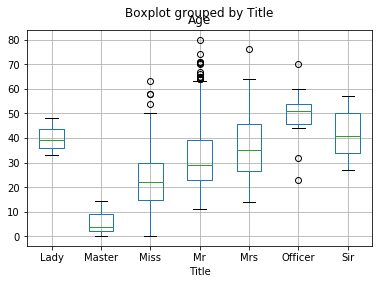

In [48]:
df[df.Age.notnull()].boxplot("Age", "Title");

In [49]:
#replace missing values
title_age_median = df.groupby("Title").Age.transform("median")
df.Age.fillna(title_age_median, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 14 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Fare_Bin    1308 non-null category
AgeState    1309 non-null object
Title       1309 non-null object
dtypes: category(1), float64(2), int64(4), object(7)
memory usage: 144.6+ KB


## Outlier Detection

histogram

boxplot

scatterplot

### Solutions

- removal
- transformation
- binning
- imputation

- do nothing

## Working with outliers

Age

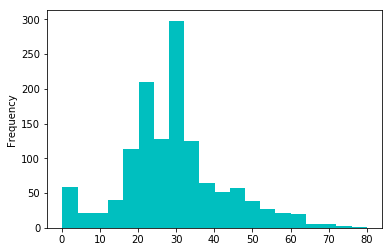

In [51]:
df.Age.plot(kind="hist", bins=20, color="c");

In [52]:
df.loc[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,AgeState,Title
PassengerId,,,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,very_high,Adult,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,very_low,Adult,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,very_high,Adult,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,high,Adult,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,very_low,Adult,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,very_high,Adult,Mrs


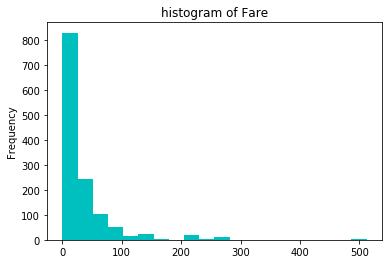

In [53]:
df.Fare.plot(kind="hist", title="histogram of Fare", bins=20, color="c");

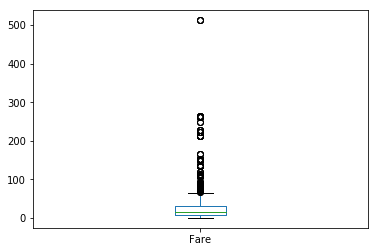

In [54]:
df.Fare.plot(kind="box");

In [55]:
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,AgeState,Title
PassengerId,,,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,very_high,Adult,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,very_high,Adult,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,very_high,Adult,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,very_high,Adult,Mrs


In [56]:
# Try transformation to reduce the skewness
log_fare = np.log(df.Fare + 1.0) # adding 0 to accomodate 0 values*

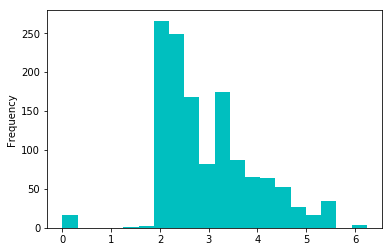

In [57]:
log_fare.plot(kind="hist", color="c", bins=20);

In [58]:
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
              ...        
1303    (31.275, 512.329]
1304      (-0.001, 7.896]
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [59]:
pd.qcut(df.Fare, 4, labels=["very_low", "low", "high", "very_high"])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
          ...    
1303    very_high
1304     very_low
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

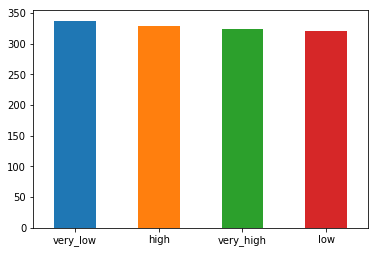

In [60]:
pd.qcut(df.Fare, 4, labels=["very_low", "low", "high", "very_high"]).value_counts().plot(kind="bar", rot=0)

In [61]:
df["Fare_Bin"] = pd.qcut(df.Fare, 4, labels=["very_low", "low", "high", "very_high"])

## Feature Engineering

In [62]:
df["AgeState"] = np.where(df["Age"] >= 18, "Adult", "Child")

In [63]:
df["AgeState"].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [64]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


## Feature: FamilySize

In [65]:
df["FamilySize"] = df.Parch + df.SibSp + 1

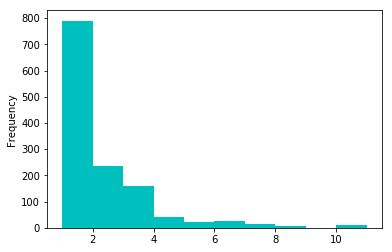

In [66]:
df["FamilySize"].plot(kind="hist", color="c")

In [69]:
df.loc[df.FamilySize == df.FamilySize.max(), ["Name", "Survived", "FamilySize", "Ticket"]]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [70]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


## Feature: isMother

In [71]:
df["isMother"] = np.where(((df.Sex == "female") & (df.Parch > 0) & (df.Title != "Miss")), 1, 0)

In [72]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].isMother)

isMother,0,1
Survived,,
0,533,16
1,302,40


## Deck

In [73]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
6        NaN
7        E46
        ... 
1303     C78
1304     NaN
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [74]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [75]:
df.loc[df.Cabin == "T"]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fare_Bin,AgeState,Title,FamilySize,isMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,very_high,Adult,Mr,1,0


In [76]:
#Set Cabin value to NaN
df.loc[df.Cabin == "T", "Cabin"] = np.NaN

In [77]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [78]:
# extract first character of Cabin String to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), "Z")
df["Deck"] = df["Cabin"].map(lambda x: get_deck(x))

In [80]:
# check counts
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [81]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
Title         1309 non-null object
FamilySize    1309 non-null int64
isMother      1309 non-null int64
Deck          1309 non-null object
dtypes: category(1), float64(2), int64(6), object(8)
memory usage: 175.3+ KB


## Categorical Feature Encoding

In [83]:
#Sex
df["isMale"] = np.where(df.Sex == "male", 1, 0)

In [84]:
df = pd.get_dummies(df, columns=["Deck", "Pclass", "Title", "Fare_Bin", "Embarked", "AgeState"])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
isMother              1309 non-null int64
isMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

In [87]:
df.drop(["Cabin", "Name", "Ticket", "Parch", "SibSp", "Sex"], axis=1, inplace=True)

In [90]:
#reorder columns
columns = [column for column in df.columns if column != "Survived"]
columns = ["Survived"] + columns
df = df[columns]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
isMother              1309 non-null int64
isMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

## Save Processed Dataset

In [95]:
processed_data_path = os.path.join(os.path.pardir, "data", "processed")
write_train_path = os.path.join(processed_data_path, "train.csv")
write_test_path = os.path.join(processed_data_path, "test.csv")

In [96]:
df.loc[df.Survived != -888].to_csv(write_train_path)

#test data
columns = [column for column in df.columns if column != "Survived"]
df.loc[df.Survived == -888, columns].to_csv(write_test_path)

## Building the data processing script

In [97]:
get_processed_data_script_file = os.path.join(os.path.pardir, "src", "data", "get_processed_data.py")

In [104]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    #set the path of the raw data
    raw_data_path = os.path.join("../data", "raw")
    train_file_path = os.path.join(raw_data_path, "train.csv")
    test_file_path = os.path.join(raw_data_path, "test.csv")
    #read data in with default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df["Survived"] = -888 #Adding new Column 
    df = pd.concat((train_df, test_df), axis=0, sort=True)
    return df


def process_data(df):
    #using the method chaining concept
    return (df
            #create title attribute - then add this
            .assign(Title = lambda x: x.Name.map(get_title))
            #working missing values - start with this
            .pipe(fill_missing_values)
            #create fare bin feature
            .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=["very_low", "low","high","very_high"]))
            #create age state
            .assign(AgeState = lambda x: np.where(x.Age >= 18, "Adult", "Child"))
            .assign(FamilySize = lambda x: x.Parch + x.SibSp + 1)
            .assign(isMother = lambda x: np.where(((x.Sex == "female") & (x.Parch > 0) & (x.Age > 18) & (x.Title != "Miss")), 1, 0))
            #create deck feature
            .assign(Cabin = lambda x: np.where(x.Cabin == "T", np.nan, x.Cabin))
            .assign(Deck = lambda x: x.Cabin.map(get_deck))
            #feature encoding
            .assign(isMale = lambda x: np.where(x.Sex == "Male", 1, 0))
            .pipe(pd.get_dummies, columns=["Deck", "Pclass", "Title", "Fare_Bin", "Embarked", "AgeState"])
            #add code to drop unnecessary columns
            .drop(["Cabin", "Name", "Ticket", "Parch", "SibSp", "Sex"], axis=1)
            #reorder columns
            .pipe(reorder_columns)
           )
            
def get_title(name):
    title_group = {
        "mr": "Mr",
        "mrs": "Mrs",
        "miss": "Miss",
        "master": "Master",
        "don": "Sir",
        "rev": "Sir",
        "dr": "Officer",
        "mme": "Mrs",
        "ms": "Mrs",
        "major": "Officer",
        "lady": "Lady",
        "sir": "Sir",
        "mlle": "Miss",
        "col": "Officer",
        "capt": "Officer",
        "the countess": "Lady",
        "jonkheer": "Sir",
        "dona": "Lady"
    }
    
    first_name_with_title = name.split(",")[1]
    title = first_name_with_title.split(".")[0]
    title = title.strip().lower()
    return title_group[title]
            
def get_deck(cabin):
        return np.where(pd.notnull(cabin), str(cabin)[0], "Z")
                    
def fill_missing_values(df):
    #embarked
    df.Embarked.fillna("C", inplace=True)
    #fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == "S")]["Fare"].median()
    df.Fare.fillna(median_fare, inplace=True)
    #age
    title_age_median = df.groupby("Title").Age.transform("median")
    df.Age.fillna(title_age_median, inplace=True)
    return df
            
def reorder_columns(df):
    columns = [column for column in df.columns if column != "Survived"]
    columns = ["Survived"] + columns
    df = df[columns]
    return df
            
def write_data(df):
    processed_data_path = os.path.join(os.path.pardir, "data", "processed")
    write_train_path = os.path.join(processed_data_path, "train.csv")
    write_test_path = os.path.join(processed_data_path, "test.csv")
    #train data    
    df.loc[df.Survived != -888].to_csv(write_train_path)
    #test data
    columns = [column for column in df.columns if column != "Survived"]
    df.loc[df.Survived == -888, columns].to_csv(write_test_path)
    
if __name__ == "__main__":
    df = read_data()
    df = process_data(df)
    write_data(df)


Overwriting ../src/data/get_processed_data.py


In [105]:
!python $get_processed_data_script_file

In [106]:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
isMother              891 non-null int64
isMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-

In [107]:
test_df = pd.read_csv(test_file_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
